In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-deep')
import matplotlib.cm
cmap = matplotlib.cm.get_cmap('plasma')
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv('Mall_customers.csv')
X = data.iloc[:,[3,4]]
X.head()

,Income,Spend
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [5]:
wcss = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit_transform(X)
    wcss.append(kmeans.inertia_)
    
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37239.83554245604,
 30241.34361793659,
 25044.96776401891,
 21826.936303231643,
 20079.011003851232,
 17622.546838810133,
 16248.25073927531,
 14870.697364293363,
 12746.969092182331,
 11709.579079254074,
 10768.055086580081,
 10323.366059403561,
 9549.105315998344,
 8603.2416658461,
 8263.253971028967]

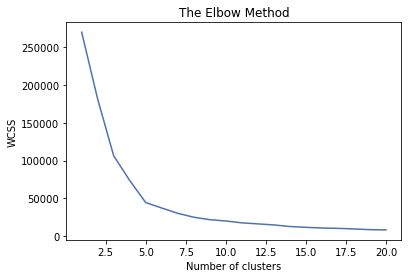

In [6]:
plt.figure()
plt.plot(range(1,21),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
k = 5
kmeans = KMeans(n_clusters =k)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [8]:
Group_cluster = pd.DataFrame(y_kmeans)
Group_cluster.columns=['Group']
full_data = pd.concat([data,Group_cluster],axis=1)
full_data

,ID,Gender,Age,Income,Spend,Group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


In [9]:
kmeans_pred = KMeans(n_clusters=k,random_state=42).fit(X)
kmeans_pred.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [11]:
kmeans_pred.predict([[100,50],[30,80]])

array([4, 3])

In [12]:
labels = [('Cluster'+str(i+1)) for i in range(k)]
labels

['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4', 'Cluster5']

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

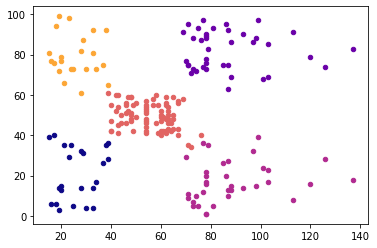

In [13]:
X=np.array(X)
plt.figure
for i in range(k):
    plt.scatter(X[y_kmeans == i,0],X[y_kmeans == i,1],s=20,c=cmap(i/k),label=labels[i])

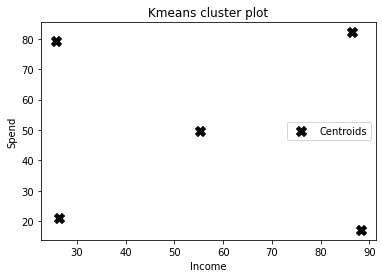

In [14]:
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='Centroids',marker='X')
plt.xlabel('Income')
plt.ylabel('Spend')
plt.title('Kmeans cluster plot')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

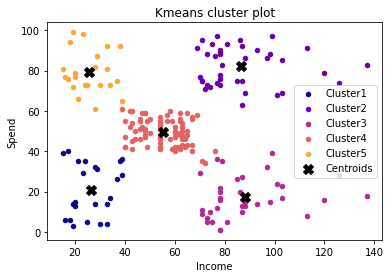

In [15]:
plt.figure()
for i in range(k):
    plt.scatter(X[y_kmeans == i,0],X[y_kmeans == i,1],s=20,c=cmap(i/k),label=labels[i])

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='Centroids',marker='X')
plt.xlabel('Income')
plt.ylabel('Spend')
plt.title('Kmeans cluster plot')
plt.legend()
plt.show()

In [17]:
from scipy.spatial.distance import cdist,pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

iris = pd.read_csv("iris.csv")
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [18]:
x_iris = iris.drop(['class'],axis=1)
y_iris = iris['class']
x_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
y_iris.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

In [20]:
x_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [21]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(x_iris)
X_scale=scale.transform(x_iris)
pd.DataFrame(X_scale).head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [24]:
K = range(1,10)
KM = [KMeans(n_clusters=k).fit(X_scale) for k in K]
centroids = [k.cluster_centers_ for k in KM]

In [25]:
D_k = [cdist(x_iris,centrds,'euclidean') for centrds in centroids]
D_k

[array([[ 6.34507683],
        [ 5.91692488],
        [ 5.83609458],
        [ 5.7497826 ],
        [ 6.32139225],
        [ 6.88621812],
        [ 5.8966092 ],
        [ 6.23297682],
        [ 5.45618915],
        [ 5.98999165],
        [ 6.71863081],
        [ 6.09918027],
        [ 5.83180932],
        [ 5.35817133],
        [ 7.14982517],
        [ 7.36613874],
        [ 6.79852925],
        [ 6.34901567],
        [ 7.06470098],
        [ 6.54140658],
        [ 6.60681466],
        [ 6.48922183],
        [ 5.92958683],
        [ 6.32771681],
        [ 6.18465844],
        [ 6.04979338],
        [ 6.26737585],
        [ 6.44825558],
        [ 6.37181293],
        [ 5.91016074],
        [ 5.93717104],
        [ 6.56734345],
        [ 6.79043445],
        [ 7.06328535],
        [ 5.98999165],
        [ 6.05970296],
        [ 6.65056389],
        [ 5.98999165],
        [ 5.48543526],
        [ 6.31347765],
        [ 6.24739946],
        [ 5.22685374],
        [ 5.59732079],
        [ 6

In [26]:
cldx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X_scale.shape[0] for d in dist]

In [28]:
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(X_scale)**2)/X_scale.shape[0]
bss = tss-wcss

Text(0, 0.5, 'Average within-cluster sum of squares')

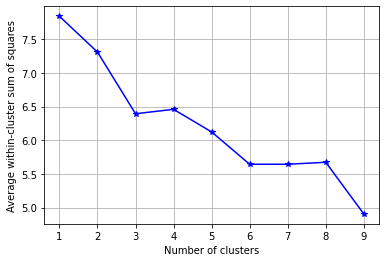

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K,avgWithinSS,'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')


Text(0, 0.5, 'Percentage of variance explained')

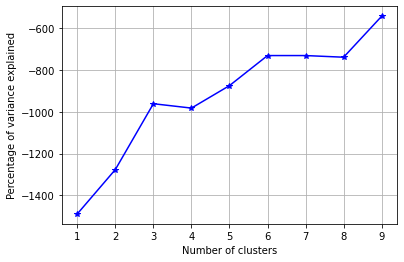

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K,bss/tss*100,'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')

In [32]:
import numpy as np
w,v = np.linalg.eig(np.array([[0.91335,0.75969],[0.75969,0.69702]]))
print("\nEigen Values\n",w)
print("\nEigen Vectors\n",v)


Eigen Values
 [1.57253666 0.03783334]

Eigen Vectors
 [[ 0.75530088 -0.6553782 ]
 [ 0.6553782   0.75530088]]


In [33]:
k_means_fit = KMeans(n_clusters=4,max_iter = 300)
k_means_fit.fit(X_scale)

KMeans(n_clusters=4)

In [34]:
k_means_fit.cluster_centers_

array([[ 1.16743407,  0.15377779,  1.00314548,  1.02963256],
       [-1.28213558,  0.22643209, -1.30968035, -1.29836862],
       [-0.01139555, -0.87288504,  0.37688422,  0.31165355],
       [-0.70049078,  1.56529014, -1.29924123, -1.20436862]])

In [35]:
print("\nK-means Clustering - Confusion Matrix\n\n",pd.crosstab(y_iris,k_means_fit.labels_,rownames = ["Actuall"],colnames=["Predicted"]))


K-means Clustering - Confusion Matrix

 Predicted         0   1   2   3
Actuall                        
Iris-setosa       0  27   0  23
Iris-versicolor  11   0  39   0
Iris-virginica   33   0  17   0


In [36]:
print("\nSilhouette-score: 0.3f" % silhouette_score(x_iris,k_means_fit.labels_,metric='euclidean'))


Silhouette-score: 0.3f


In [40]:
for k in range(2,10):
    k_means_fitk = KMeans(n_clusters=k,max_iter=300)
    k_means_fitk.fit(x_iris)
    print("For k value",k,"silhouette-score: %0.3f" %silhouette_score(x_iris,k_means_fitk.labels_,metric='euclidean'))

For k value 2 silhouette-score: 0.681
For k value 3 silhouette-score: 0.553
For k value 4 silhouette-score: 0.498
For k value 5 silhouette-score: 0.489
For k value 6 silhouette-score: 0.482
For k value 7 silhouette-score: 0.355
For k value 8 silhouette-score: 0.351
For k value 9 silhouette-score: 0.342


In [41]:
plt.style.use('seaborn-deep')
import matplotlib.cm
cmap = matplotlib.cm.get_cmap('plasma')

In [42]:
#계층적 군집 분석

import scipy.cluster.hierarchy as sch

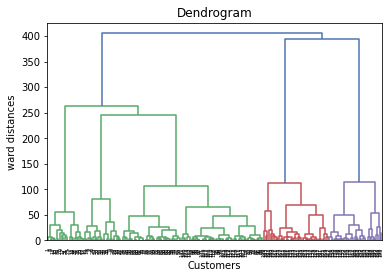

In [43]:
plt.figure(1)
z = sch.linkage(X,method='ward')
dendrogram = sch.dendrogram(z)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('ward distances')
plt.show()

In [45]:
k = 5
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=k,affinity = "euclidean",linkage='ward')
y_hc = hc.fit_predict(X)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

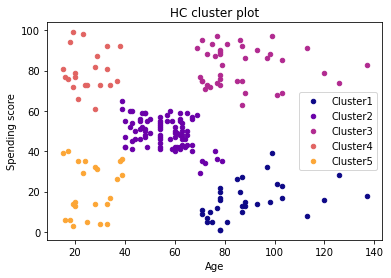

In [47]:
labels = [('Cluster'+str(i+1)) for i in range(k)]
plt.figure(2)
for i in range(k):
    plt.scatter(X[y_hc ==i,0],X[y_hc == i,1],s=20,c = cmap(i/k),label = labels[i])
plt.xlabel('Age')
plt.ylabel('Spending score')
plt.title('HC cluster plot')
plt.legend()
plt.show()